In [3]:
import pandas as pd  # Import pandas

# Load the dataset
file_path = "C:\\Users\\patha\\OneDrive\\Desktop\\Case studies\\Bike Sales\\Bike_Sales.xlsx"

# Read the Excel file
df = pd.read_excel(file_path)

# Display basic information about the dataset
df.info()

# Show the first few rows
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


### We'll check for missing values, duplicates, and ensure the data types are correct for analysis.



In [4]:
# Check for missing values
missing_values = df.isnull().sum()

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()

# Display results
print("Missing Values:\n", missing_values)
print("\nNumber of Duplicate Rows:", duplicate_rows)

# Convert necessary columns to correct types
df["Date"] = pd.to_datetime(df["Date"])  # Ensure Date column is in datetime format
df["Customer_Age"] = df["Customer_Age"].astype(int)  # Ensure age is integer
df["Order_Quantity"] = df["Order_Quantity"].astype(int)  # Ensure order quantity is integer
df["Unit_Cost"] = df["Unit_Cost"].astype(float)  # Convert cost-related columns to float
df["Unit_Price"] = df["Unit_Price"].astype(float)
df["Profit"] = df["Profit"].astype(float)
df["Cost"] = df["Cost"].astype(float)
df["Revenue"] = df["Revenue"].astype(float)

# Verify changes
df.info()


Missing Values:
 Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

Number of Duplicate Rows: 1000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int32         
 5   Age_Group         113036 non-null  object

In [5]:
# Remove duplicate rows
df = df.drop_duplicates()

# Verify removal
print("Number of Duplicate Rows after removal:", df.duplicated().sum())


Number of Duplicate Rows after removal: 0


In [6]:
# Summary statistics for numerical columns
df.describe()


,Date,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,112036,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000
mean,2014-11-23 05:22:32.008282880,15.665607,2014.400925,35.919508,11.904254,267.819603,453.850628,286.035194,471.103333,757.138527
min,2011-01-01 00:00:00,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,2013-12-22 00:00:00,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,64.000000
50%,2014-06-27 00:00:00,16.000000,2014.000000,35.000000,10.000000,9.000000,25.000000,103.000000,112.000000,226.000000
75%,2016-01-09 00:00:00,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,360.000000,442.000000,806.000000
max,2016-07-31 00:00:00,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000
std,NaN,8.781485,1.273327,11.016543,9.564877,550.218722,922.751848,454.852634,886.971635,1312.061623


### Checking Negative Profit Entries


In [7]:
# Filter records with negative profit
negative_profit = df[df["Profit"] < 0]
negative_profit


,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
17098,2013-12-09,9,December,2013,20,Youth (<25),M,France,Yveline,Clothing,Caps,AWC Logo Cap,21,7.0,9.0,-3.0,147.0,144.0
17099,2015-12-09,9,December,2015,20,Youth (<25),M,France,Yveline,Clothing,Caps,AWC Logo Cap,23,7.0,9.0,-4.0,161.0,157.0
17484,2013-10-23,23,October,2013,34,Young Adults (25-34),M,France,Yveline,Clothing,Caps,AWC Logo Cap,28,7.0,9.0,-4.0,196.0,192.0
17485,2015-10-23,23,October,2015,34,Young Adults (25-34),M,France,Yveline,Clothing,Caps,AWC Logo Cap,29,7.0,9.0,-5.0,203.0,198.0
17486,2014-03-23,23,March,2014,34,Young Adults (25-34),M,France,Yveline,Clothing,Caps,AWC Logo Cap,4,7.0,9.0,-1.0,28.0,27.0
17662,2013-11-18,18,November,2013,48,Adults (35-64),M,France,Yveline,Clothing,Caps,AWC Logo Cap,21,7.0,9.0,-3.0,147.0,144.0
17663,2015-11-18,18,November,2015,48,Adults (35-64),M,France,Yveline,Clothing,Caps,AWC Logo Cap,19,7.0,9.0,-3.0,133.0,130.0
17972,2013-09-12,12,September,2013,22,Youth (<25),M,France,Yveline,Clothing,Caps,AWC Logo Cap,4,7.0,9.0,-1.0,28.0,27.0
17973,2015-09-12,12,September,2015,22,Youth (<25),M,France,Yveline,Clothing,Caps,AWC Logo Cap,4,7.0,9.0,-1.0,28.0,27.0
18130,2014-07-07,7,July,2014,30,Young Adults (25-34),M,France,Yveline,Clothing,Caps,AWC Logo Cap,13,7.0,9.0,-2.0,91.0,89.0


### Profit Categories

In [8]:
# Grouping data by Product_Category and summing up the Profit
profit_by_category = df.groupby("Product_Category")["Profit"].sum().sort_values(ascending=False)

# Display the result
print(profit_by_category)


Product_Category
Bikes          20399726.0
Accessories     8807194.0
Clothing        2839319.0
Name: Profit, dtype: float64


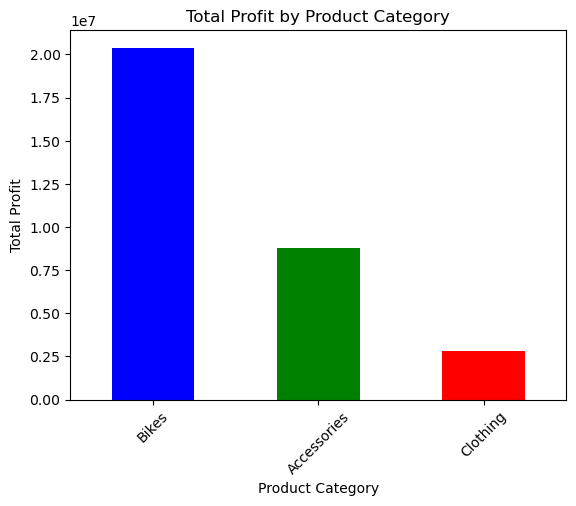

In [9]:
import matplotlib.pyplot as plt  

# Plot the profit distribution across product categories
profit_by_category.plot(kind="bar", color=["blue", "green", "red"])  
plt.title("Total Profit by Product Category")  
plt.xlabel("Product Category")  
plt.ylabel("Total Profit")  
plt.xticks(rotation=45)  
plt.show()


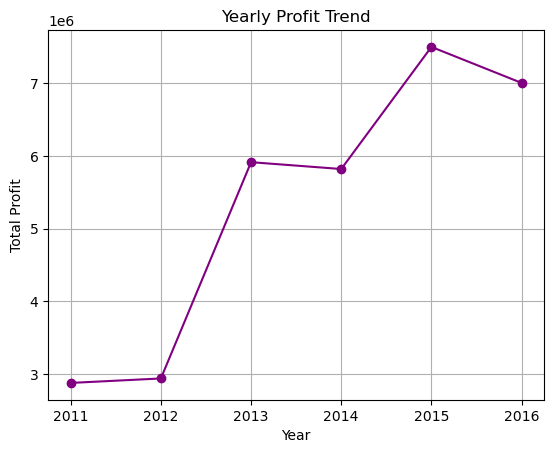

In [10]:
# Group by Year and sum the profit
profit_by_year = df.groupby("Year")["Profit"].sum()

# Plot the trend
profit_by_year.plot(kind="line", marker="o", color="purple", linestyle="-")  
plt.title("Yearly Profit Trend")  
plt.xlabel("Year")  
plt.ylabel("Total Profit")  
plt.grid(True)  
plt.show()


In [12]:
# Group by Product and sum the Profit
top_profitable_products = df.groupby('Product')['Profit'].sum().sort_values(ascending=False).head(10)

# Display the top 10 most profitable products
print(top_profitable_products)


Product
Mountain-200 Black, 38     1302237.0
Road-150 Red, 62           1237388.0
Mountain-200 Silver, 42    1226878.0
Sport-100 Helmet, Red      1191175.0
Mountain-200 Silver, 38    1155311.0
Sport-100 Helmet, Black    1140795.0
Mountain-200 Black, 46     1075401.0
Sport-100 Helmet, Blue     1047701.0
Road-150 Red, 52           1044569.0
Mountain-200 Black, 42     1032061.0
Name: Profit, dtype: float64


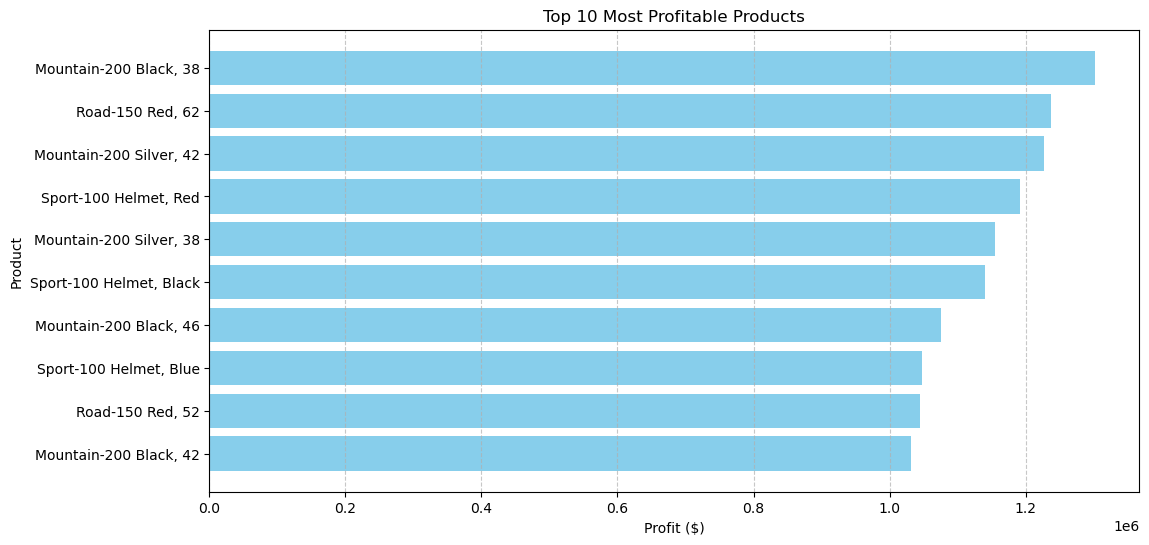

In [13]:
import matplotlib.pyplot as plt

# Data for the top 10 most profitable products
products = [
    "Mountain-200 Black, 38",
    "Road-150 Red, 62",
    "Mountain-200 Silver, 42",
    "Sport-100 Helmet, Red",
    "Mountain-200 Silver, 38",
    "Sport-100 Helmet, Black",
    "Mountain-200 Black, 46",
    "Sport-100 Helmet, Blue",
    "Road-150 Red, 52",
    "Mountain-200 Black, 42",
]

profits = [
    1302237.0, 1237388.0, 1226878.0, 1191175.0, 1155311.0,
    1140795.0, 1075401.0, 1047701.0, 1044569.0, 1032061.0
]

# Plot
plt.figure(figsize=(12, 6))
plt.barh(products[::-1], profits[::-1], color="skyblue")
plt.xlabel("Profit ($)")
plt.ylabel("Product")
plt.title("Top 10 Most Profitable Products")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()
